In [1]:
from __future__ import division
import numpy as np
from scipy.integrate import solve_ivp
from scipy import interpolate 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date
import datetime
import seaborn as sns
from myfunctions_multi_scale import *
%matplotlib inline

In [2]:
# Import of I data
# irradiance data is based on meteorological data from: https://ims.data.gov.il/he/ims/6 
dFI = pd.read_csv('../data/ims_data_2014_umol_photons.csv',encoding= 'unicode_escape',header=None)
days = list(range(1,366))

In [3]:
# assign light data into an array for annual T and I plot

I_plot = np.zeros(24*365)
light_hours = list(range(5,19))
for day in days:
    for hour in light_hours:
        I_plot[(day - 1)*24 + hour] = float(dFI.iloc[day][hour-1])

annual_hours = list(range(1,(366-1)*24+1))
f0 = interpolate.interp1d(annual_hours, I_plot,kind = 'linear')

January 16
February 17
March 19
April 24
May 25
June 26
July 28
August 29
September 29.5
October 25
November 21
December 18


[Text(0, 0, '1 Jan'),
 Text(0, 0, '1 February'),
 Text(0, 0, '1 March'),
 Text(0, 0, '1 April'),
 Text(0, 0, '1 May'),
 Text(0, 0, '1 June'),
 Text(0, 0, '1 July'),
 Text(0, 0, '1 August'),
 Text(0, 0, '1 September'),
 Text(0, 0, '1 October'),
 Text(0, 0, '1 November'),
 Text(0, 0, '1 December')]

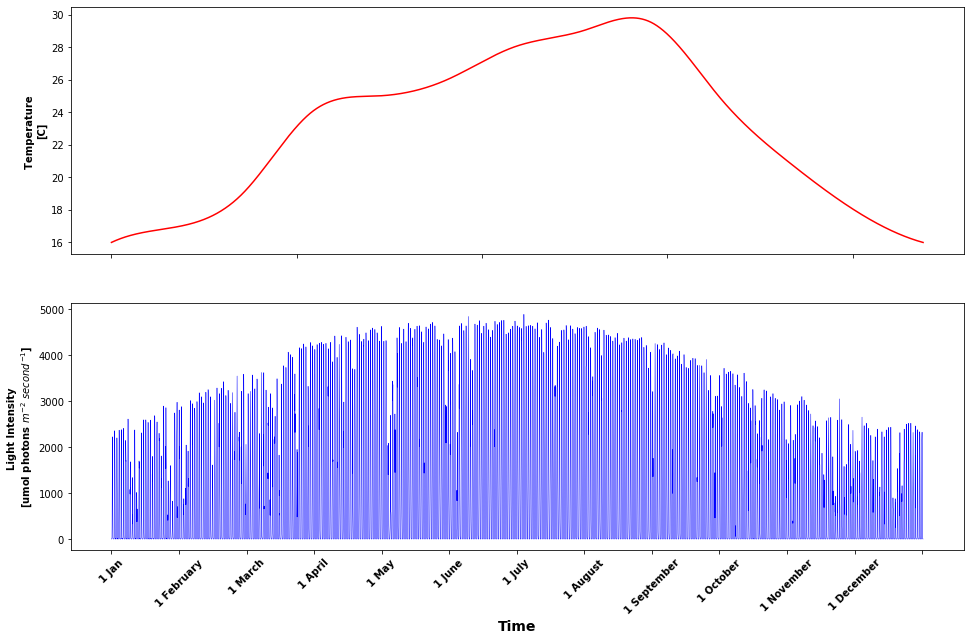

In [4]:
# T and light data

x1 = pd.ExcelFile('../data/input.xlsx')

dfT = x1.parse('T_multi-scale',header=None)
# Temperatures are water temperatures, taken from:
# Y. Suari, et al., Sandbar Breaches Control of the Biogeochemistry of a Micro-Estuary RIME-restoration of
# Israeli micro estuaries. Front. Mar. Sci. (2019) 

days_reduced,hours_reduced = [],[]
for i in range(1,13):
    day = datetime.datetime(2014, i, 1)
    days_reduced.append(int(day.strftime("%j")))

days_reduced.append(366)
for j in range(1,13):
    day = datetime.datetime(2014, j, 1)
    hours_reduced.append((int(day.strftime("%j"))-1)*24)
hours_reduced.append((366-1)*24)
T = []

# assigmment of parameters to values: 
for key,val in zip(dfT.iloc[1:][0],dfT.iloc[1:][1]):
    exec(key + '=val')
    T.append(val)
    print(key,val)
T.append(T[0])
days = list(range(1,366))

f1 = interpolate.interp1d(hours_reduced, T,kind = 'cubic')
T_interp = f1(annual_hours)

fig, ax = plt.subplots(2,1,figsize=(16,10))
xlabels = ['1 Jan', '1 February', '1 March', '1 April', '1 May', '1 June', '1 July', '1 August', '1 September', '1 October','1 November', '1 December']

ax[0].plot(annual_hours,T_interp, 'r-')
ax[1].plot(annual_hours,I_plot, 'b-', linewidth=0.5)

ax[1].set_xlabel('Time',fontsize=14, weight="bold")
ax[0].set_ylabel('Temperature \n[C]',fontsize=10, weight="bold")
ax[1].set_ylabel('Light Intensity \n[umol photons $m^{-2}$ $second^{-1}$]',fontsize=10, weight="bold")
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[1].set_xticks(annual_hours[0:len(annual_hours):int(len(annual_hours)/12-1)])
ax[1].set_xticklabels([str(i) for i in xlabels], rotation=45,fontsize=10, weight="bold")

In [5]:
# assign light data into an array for simulations

I = np.zeros(24*365)
light_hours = list(range(5,19))
for day in days:
    for hour in light_hours:
        I[(day - 1)*24 + hour] = 0.43 * float(dFI.iloc[day][hour-1])

annual_hours = list(range(1,(366-1)*24+1))
f0 = interpolate.interp1d(annual_hours, I,kind = 'linear')

In [6]:
x1 = pd.ExcelFile('../data/input.xlsx')
df1 = x1.parse('Parameters_multi-scale',header=None)

# assigmment of parameters to values: 
for key,val in zip(df1.iloc[:][0],df1.iloc[:][1]):
    exec(key + '=val')
    print(key,val)

n_reactors = np.int(n_reactors)

umol_to_percent_DW 0.0014
n_days 14.0
Next0 500.0
Nint0 1.85
m0 0.15
S 30.0
Nintcrit 2.002
n_reactors 541.0
Qp 459.5833333333333
Qsea 7775.568181818181
Nsea 500.0
dilution 0.0
miu 0.027
Nintmax 4.2
Nintmin 0.7
KN 1.2
Ks 14.0
Vmax 60.0
Z 1.0
KI 20.0
K0 1.5
Ka 0.15
Topt 18.0
Tmin 5.0
Tmax 31.5
n 2.0
losses20 0.0016
teta 1.047
Sopt 18.0
Smin 0.0
Smax 45.0
Shigh 30.0
Slow 12.0


Starting point
Done


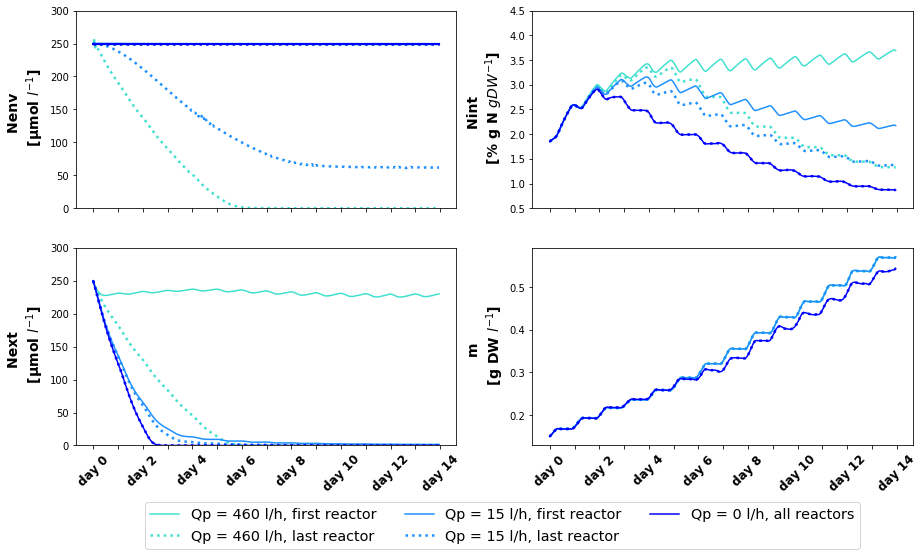

In [7]:
# N and biomass Dynamics in spring - 3 Qp values, first and last cage
n_reactors = 731 # according to spring farm size
Nsea = 250
Next0 = 250


NSEA, NEXT, NINT, M, Total_N, T = [],[],[],[],[],[]

print('Starting point')


# setup initial conditions identical for all reactors
x0 = n_reactors*[Nsea, Next0, Nint0, m0]

dilution = 0
weeks = [7]#1, 7, 33, 45]
Qps = [460, 15, 0]
seasons = ['Winter', 'Spring', 'Summer','Autumn']
for week0 in weeks:
    Total_biomass = []
    NSEA_seasons_f = []
    Final_NSEA = []
    NSEA_Qp1, NEXT_Qp1, NINT_Qp1, M_Qp1 = [],[],[],[]
    NSEA_Qp2, NEXT_Qp2, NINT_Qp2, M_Qp2 = [],[],[],[]
    for Qp in Qps:
        t0 = 10 + 7 * 24 * (week0-1)
        t = list(range(t0,t0 + int(n_days*24)))
        times = list(range(t0,t0 + int(n_days*24)))
        args = (Nintcrit,Nintmax,Nintmin,Vmax,Ks,KN,miu,S,Z,KI,K0,Ka,Topt,Tmin,Tmax,losses20,
                teta,Sopt,Smin,Smax, Qp, Qsea, Nsea,f1,f0,dilution,n,umol_to_percent_DW)

        # solve the ODEs using the new syntax
        sol = solve_ivp(multi_N_f_un, [t[0], t[-1]], x0, args=args, t_eval = t)

        # take the solution of the state variables:
        M_farm = []
        N_farm = []
        NSEA, NEXT, NINT, M, N_farm, Total_N, T = [],[],[],[],[],[],[]
        for i_reactor in range(n_reactors):
            for i in range(i_reactor+1):
                NSEA.append(sol.y[i*4,:])
                NEXT.append(sol.y[i*4+1,:])
                NINT.append(sol.y[i*4+2,:])
                M.append(sol.y[i*4+3,:])
                M_farm.append((M[-1][-1] - m0) * 1.785)
                N_farm.append((M[-1][-1] * NINT[-1][-1] - m0 * Nint0) * 1.785 / 100)
            Total_biomass.append(round(sum(M_farm),1))
            Total_N.append(round(sum(N_farm),2))
            T.append(sol.t)

        NSEA_Qp1.append(NSEA[0])
        NSEA_Qp2.append(NSEA[-1])
        NEXT_Qp1.append(NEXT[0])
        NEXT_Qp2.append(NEXT[-1])
        NINT_Qp1.append(NINT[0])
        NINT_Qp2.append(NINT[-1])
        M_Qp1.append(M[0])
        M_Qp2.append(M[-1])
        x0 = n_reactors*[Nsea, Next0, Nint0, m0]
    season = seasons[weeks.index(week0)]
    plot_result_Qp_2cages(T,NSEA_Qp1,NSEA_Qp2,NEXT_Qp1,NEXT_Qp2,NINT_Qp1,NINT_Qp2,M_Qp1,M_Qp2,Nsea,Qps,season)    

print("Done")

In [8]:
# create a dictionary of all the data
tmp = {'T':T,'NSEA_Qp1':NSEA_Qp1,'NSEA_Qp2':NSEA_Qp2,'NEXT_Qp1':NEXT_Qp1,'NEXT_Qp2':NEXT_Qp2, 'NINT_Qp1':NINT_Qp1,'NINT_Qp2':NINT_Qp2,'M_Qp1':M_Qp1,'M_Qp2':M_Qp2,'Nsea':Nsea,'Qps':Qps}

# store it in Python binary format for preservation
import pickle
pickle.dump(tmp,open('Qp.pkl','wb'))

# store in a human readable ASCII table, again for preservation only
# this file would be difficult to read as a Pandas dataframe 
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in tmp.items() ])).to_csv('Qp.csv')

In [9]:
df = pd.read_csv('Qp.csv')

In [10]:
# import pickle
# Test reading of the stored data 
tmp1 = pickle.load(open('Qp.pkl','rb'))

In [11]:
# import pickle
# Test reading of the stored data 

d = pickle.load(open('Qp.pkl','rb'))
keys, values = zip(*d.items())
print(keys) # to see the order is correct

('T', 'NSEA_Qp1', 'NSEA_Qp2', 'NEXT_Qp1', 'NEXT_Qp2', 'NINT_Qp1', 'NINT_Qp2', 'M_Qp1', 'M_Qp2', 'Nsea', 'Qps')


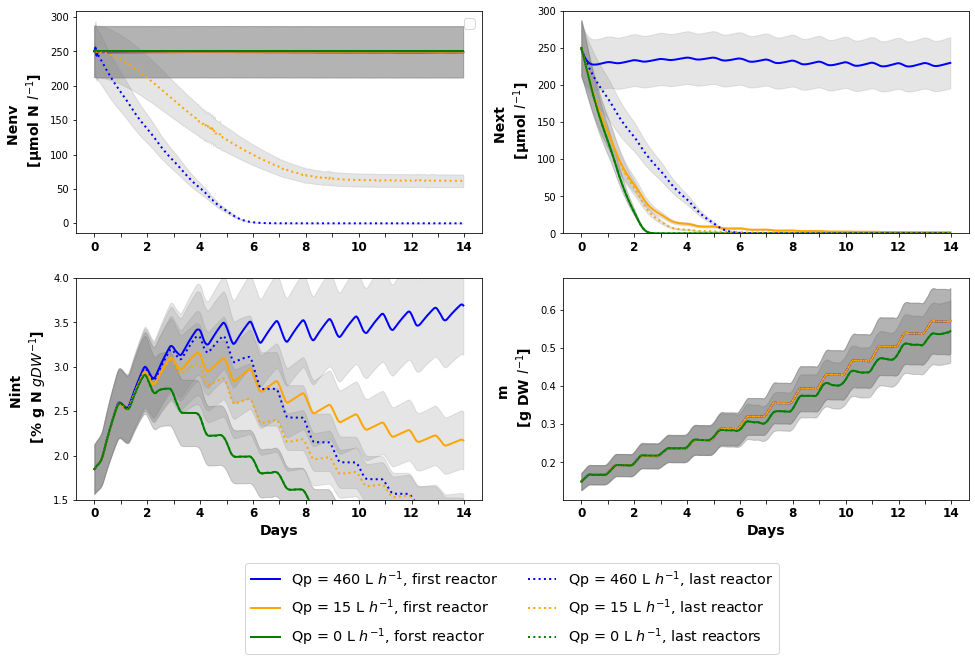

In [12]:
# Plot N and biomass Dynamics in spring - 3 Qp values, first and last cage + Shadow error intervals

# data and parameters

Nsea = d['Nsea']
T = d['T']
NSEA_Qp1 = d['NSEA_Qp1']
NSEA_Qp2 = d['NSEA_Qp2']
NEXT_Qp1 = d['NEXT_Qp1']
NEXT_Qp2 = d['NEXT_Qp2']
NINT_Qp1 = d['NINT_Qp1']
NINT_Qp2 = d['NINT_Qp2']
M_Qp1 = d['M_Qp1']
M_Qp2 = d['M_Qp2']
Nsea = d['Nsea']
Qps = d['Qps']


xlabels = [
    "0",
    "",
    "2",
    "",
    "4",
    "",
    "6",
    "",
    "8",
    "",
    "10",
    "",
    "12",
    "",
    "14",
]

t = T[0]
I = []
colors = ["turquoise", "dodgerblue", "blue"]
    
fig, ax = plt.subplots(2, 2, figsize=(16, 9))


# Plot beauty
ax.flat[2].set_ylim([1.5, 4])
ax.flat[1].set_ylim([0, Nsea * 1.2])

ax.flat[0].set_ylabel(
    "Nenv \n [µmol N $l^{-1}$]", fontsize=14, weight="bold"
)
ax.flat[2].set_xlabel(
    "Days", fontsize=14, weight="bold"
)
ax.flat[3].set_xlabel(
    "Days", fontsize=14, weight="bold"
)
ax.flat[1].set_ylabel("Next \n [µmol $l^{-1}$]", fontsize=14, weight="bold")
ax.flat[2].set_ylabel(
    "Nint \n [% g N $g DW^{-1}$]", fontsize=14, weight="bold"
)
ax.flat[3].set_ylabel("m \n [g DW $l^{-1}$]", fontsize=14, weight="bold")

ax.flat[1].set_xticklabels([])
ax.flat[0].set_xticks(np.linspace(0, 14 * 24, 15))
ax.flat[1].set_xticks(np.linspace(0, 14 * 24, 15))
ax.flat[3].set_xticks(np.linspace(0, 14 * 24, 15))
ax.flat[2].set_xticks(np.linspace(0, 14 * 24, 15))


ax.flat[0].set_xticklabels(
    [str(i) for i in xlabels], fontsize=12
)
ax.flat[1].set_xticklabels(
    [str(i) for i in xlabels], fontsize=12
)
ax.flat[3].set_xticklabels(
    [str(i) for i in xlabels], fontsize=12
)
ax.flat[2].set_xticklabels(
    [str(i) for i in xlabels], fontsize=12
)

ax.flat[0].set_xticklabels(
    [str(i) for i in xlabels], fontsize=12, weight="bold"
)
ax.flat[1].set_xticklabels(
    [str(i) for i in xlabels], fontsize=12, weight="bold"
)
ax.flat[2].set_xticklabels(
    [str(i) for i in xlabels], fontsize=12, weight="bold"
)
ax.flat[3].set_xticklabels(
    [str(i) for i in xlabels], fontsize=12, weight="bold"
)


ax.flat[0].legend(Qps, loc="upper right", fontsize=14)

colors = ['b','orange','g']
count = 0

# plot lines of first reactors (full line)

v1 = values[1:8:2] # v1 gets 4 array of data for 4 variable values in the first reactor
# NSEA_Qp1, NEXT_Qp1, NINT_Qp1, M_Qp1

k = 0 # sub-plot (flat)
for i in v1: # i gets each time an array of values for the specific variable for a specific Qp
    c = 0 # color setup
    for j in list(range(len(i))):
        #print(i[j])
        data = np.vstack(i[j])
        ax.flat[k].plot(data,linewidth=2, color = colors[c]);
        ax.flat[k].fill_between(np.arange(data.shape[0]),data.min(axis=1)*.85,data.max(axis=1)*1.15,color="gray",alpha=.2)
        c = c + 1
    k = k + 1
   
v2 = values[2:9:2] # v1 gets 4 array of data for 4 variable values in the first reactor
# NSEA_Qp1, NEXT_Qp1, NINT_Qp1, M_Qp1

k = 0 # sub-plot (flat)
for i in v2: # i gets each time an array of values for the specific variable for a specific Qp
    c = 0 # color setup
    for j in list(range(len(i))):
        data = np.vstack(i[j])
        ax.flat[k].plot(data,linewidth=2, color = colors[c],linestyle = ":");
        ax.flat[k].fill_between(np.arange(data.shape[0]),data.min(axis=1)*.85,data.max(axis=1)*1.15,color="gray",alpha=.2)
        c = c + 1
    k = k + 1

legend = ax.flat[3].legend(
    [
        "Qp = 460 L $h^{-1}$, first reactor",
        "Qp = 15 L $h^{-1}$, first reactor",
        "Qp = 0 L $h^{-1}$, forst reactor",
        "Qp = 460 L $h^{-1}$, last reactor",
        "Qp = 15 L $h^{-1}$, last reactor",        
        "Qp = 0 L $h^{-1}$, last reactors",
        
    ],
    ncol=2,
    fontsize="x-large",
    framealpha=0.8,
    bbox_to_anchor=(0.55, -0.25),
)